<a href="https://colab.research.google.com/github/rosehelfrich/Ky_School_data/blob/main/Summarize_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Column / Row options
pd.options.display.max_columns = None
pd.options.display.max_rows = 20

# Two decimal places and the thousands separator
pd.options.display.float_format = '{:,.2f}'.format

# Reset float format
#pd.reset_option('display.float_format')

In [4]:
predict_df = pd.read_csv('/content/drive/MyDrive/Colab Data/KY EPSB/All Years/predict_df.csv')

In [5]:
predict_df[predict_df['School'].str.contains("Atherton")]

,End Year,District Code,District,School Code,School,Level,Proficiency Rate,Classification,Rating,Reported Spending per student,Money Difference per school,Money Difference per student,Estimated Spending per student
528,"2,012.00",275,Jefferson County,275018,Atherton High,HS,60.00,Proficient,*Low,"7,980.00","208,600.00",180.00,"8,153.00"
1709,"2,013.00",275,Jefferson County,275018,Atherton High,HS,66.00,Distinguished,*Low,"8,180.00","343,700.00",280.00,"8,459.00"
2891,"2,014.00",275,Jefferson County,275018,Atherton High,HS,77.00,Distinguished,*Low,"8,230.00","422,100.00",340.00,"8,574.00"
4091,"2,015.00",275,Jefferson County,275018,Atherton High,HS,80.00,Distinguished,*Low,"7,870.00","473,600.00",360.00,"8,231.00"
5293,"2,016.00",275,Jefferson County,275018,Atherton High,HS,83.00,Distinguished,*High,"10,920.00","801,700.00",600.00,"11,514.00"
6500,"2,017.00",275,Jefferson County,275018,Atherton High,HS,76.00,*Distinguished,*Medium,"11,930.00","832,300.00",580.00,"12,513.00"
7725,"2,018.00",275,Jefferson County,275018,Atherton High,HS,79.00,*Distinguished,*High,"13,970.00","850,400.00",600.00,"14,563.00"
8968,"2,019.00",275,Jefferson County,275018,Atherton High,HS,80.00,Distinguished,Very High,"14,130.00","572,600.00",400.00,"14,535.00"
10223,"2,022.00",275,Jefferson County,275018,Atherton High,HS,73.00,*Distinguished,High,"10,401.25","563,125.00",417.50,"10,817.75"


In [6]:
# Excluding the 2022 year so we can get the pre-covid trend. 

#trends_df = predict_df[predict_df['End Year'] != 2022]
#trends_df.reset_index(drop= True, inplace= True)

In [7]:
predict_df[predict_df['School'] == 'Atherton High']

,End Year,District Code,District,School Code,School,Level,Proficiency Rate,Classification,Rating,Reported Spending per student,Money Difference per school,Money Difference per student,Estimated Spending per student
528,"2,012.00",275,Jefferson County,275018,Atherton High,HS,60.00,Proficient,*Low,"7,980.00","208,600.00",180.00,"8,153.00"
1709,"2,013.00",275,Jefferson County,275018,Atherton High,HS,66.00,Distinguished,*Low,"8,180.00","343,700.00",280.00,"8,459.00"
2891,"2,014.00",275,Jefferson County,275018,Atherton High,HS,77.00,Distinguished,*Low,"8,230.00","422,100.00",340.00,"8,574.00"
4091,"2,015.00",275,Jefferson County,275018,Atherton High,HS,80.00,Distinguished,*Low,"7,870.00","473,600.00",360.00,"8,231.00"
5293,"2,016.00",275,Jefferson County,275018,Atherton High,HS,83.00,Distinguished,*High,"10,920.00","801,700.00",600.00,"11,514.00"
6500,"2,017.00",275,Jefferson County,275018,Atherton High,HS,76.00,*Distinguished,*Medium,"11,930.00","832,300.00",580.00,"12,513.00"
7725,"2,018.00",275,Jefferson County,275018,Atherton High,HS,79.00,*Distinguished,*High,"13,970.00","850,400.00",600.00,"14,563.00"
8968,"2,019.00",275,Jefferson County,275018,Atherton High,HS,80.00,Distinguished,Very High,"14,130.00","572,600.00",400.00,"14,535.00"
10223,"2,022.00",275,Jefferson County,275018,Atherton High,HS,73.00,*Distinguished,High,"10,401.25","563,125.00",417.50,"10,817.75"


In [8]:
predict_df[predict_df['School'] == 'Fern Creek High']

,End Year,District Code,District,School Code,School,Level,Proficiency Rate,Classification,Rating,Reported Spending per student,Money Difference per school,Money Difference per student,Estimated Spending per student
568,"2,012.00",275,Jefferson County,275012,Fern Creek High,HS,50.00,Needs Improvement,*Low,"8,250.00","-451,400.00",-340.00,"7,914.00"
1749,"2,013.00",275,Jefferson County,275012,Fern Creek High,HS,56.00,Needs Improvement,*Low,"8,220.00","-328,600.00",-240.00,"7,977.00"
2931,"2,014.00",275,Jefferson County,275012,Fern Creek High,HS,71.00,Proficient,*Low,"8,270.00","-300,000.00",-220.00,"8,052.00"
4131,"2,015.00",275,Jefferson County,275012,Fern Creek High,HS,72.00,Proficient,*Low,"8,020.00","-304,800.00",-200.00,"7,819.00"
5333,"2,016.00",275,Jefferson County,275012,Fern Creek High,HS,74.00,Proficient,*Low,"11,240.00","-213,300.00",-140.00,"11,100.00"
6540,"2,017.00",275,Jefferson County,275012,Fern Creek High,HS,61.00,*Needs Improvement,*Low,"12,110.00","-196,200.00",-130.00,"11,980.00"
7765,"2,018.00",275,Jefferson County,275012,Fern Creek High,HS,41.00,*Needs Improvement,*Very Low,"13,690.00","-229,800.00",-140.00,"13,548.00"
9008,"2,019.00",275,Jefferson County,275012,Fern Creek High,HS,40.00,Needs Improvement,Very Low,"13,450.00","-274,900.00",-160.00,"13,284.00"
10263,"2,022.00",275,Jefferson County,275012,Fern Creek High,HS,44.00,*Needs Improvement,Low,"10,406.25","-287,375.00",-196.25,"10,209.25"


# Summarize School Data

## Avg Spending

In [9]:
school_spending = predict_df.groupby(['School Code', 'Level']).mean().loc[:,['Reported Spending per student', 
                                                                    'Money Difference per school',
                                                                    'Money Difference per student', 
                                                                    'Estimated Spending per student']]

#school_spending.dropna(inplace=True) # Drops 13 schools

In [10]:
school_spending

,,Reported Spending per student,Money Difference per school,Money Difference per student,Estimated Spending per student
School Code,Level,,,,
1010,HS,"9,355.00","-12,787.50",-17.50,"9,336.62"
1014,MS,"8,621.25","-8,212.50",-21.25,"8,598.88"
1016,ES,"9,621.25",637.50,0.00,"9,622.62"
1020,ES,"12,950.00","22,300.00",40.00,"12,993.50"
5010,ES,"11,740.00","134,762.50",147.50,"11,886.50"
...,...,...,...,...,...
601050,ES,"10,725.00","70,762.50",136.25,"10,861.75"
601075,ES,"12,065.00","-14,650.00",-30.00,"12,033.38"
601084,HS,"9,492.50","28,962.50",23.75,"9,515.38"


In [11]:
school_spending.columns =  ['Reported Spending based on district teacher experience', # Mandated reported average per student per year based on average teacher experience throughout the entire district
                            'Money Difference per school', # average per year
                            'Money Difference per student', # average per student per year
                            'Estimated Spending based on school teacher experience'] #  average per student per year

In [12]:
school_spending

,,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience
School Code,Level,,,,
1010,HS,"9,355.00","-12,787.50",-17.50,"9,336.62"
1014,MS,"8,621.25","-8,212.50",-21.25,"8,598.88"
1016,ES,"9,621.25",637.50,0.00,"9,622.62"
1020,ES,"12,950.00","22,300.00",40.00,"12,993.50"
5010,ES,"11,740.00","134,762.50",147.50,"11,886.50"
...,...,...,...,...,...
601050,ES,"10,725.00","70,762.50",136.25,"10,861.75"
601075,ES,"12,065.00","-14,650.00",-30.00,"12,033.38"
601084,HS,"9,492.50","28,962.50",23.75,"9,515.38"


## AST Proficency with pivot table

In [13]:
pivot_df = predict_df.pivot(index=['School Code', 'Level'], columns='End Year', values='Proficiency Rate')

In [14]:
pivot_df

,End Year,"2,012.00","2,013.00","2,014.00","2,015.00","2,016.00","2,017.00","2,018.00","2,019.00","2,022.00"
School Code,Level,,,,,,,,,
1010,HS,55.00,54.00,69.00,71.00,72.00,60.00,57.00,58.00,54.00
1014,MS,48.00,53.00,62.00,63.00,68.00,65.00,73.00,78.00,61.00
1016,ES,63.00,63.00,63.00,60.00,69.00,71.00,67.00,72.00,54.00
1020,ES,NaN,NaN,NaN,NaN,NaN,NaN,67.00,72.00,54.00
5010,ES,50.00,59.00,70.00,68.00,71.00,76.00,75.00,65.00,53.00
...,...,...,...,...,...,...,...,...,...,...
601050,ES,62.00,67.00,78.00,78.00,74.00,82.00,79.00,79.00,75.00
601075,ES,54.00,55.00,68.00,64.00,71.00,76.00,80.00,77.00,70.00
601084,HS,63.00,70.00,80.00,81.00,81.00,82.00,69.00,71.00,68.00


In [15]:
# We want the pre-covid classifcation, not the post covid classfication

school_summary = predict_df.sort_values(by='End Year', ascending=False).loc[:,['District', 'School Code', 'Level', 'School', 'Classification', 'Rating']]

school_summary.drop_duplicates(subset=['School Code', 'Level'], inplace=True)

#Set index to school code
school_summary.set_index(['School Code', 'Level'], inplace=True)

# Rename classification column to be more accurate
school_summary.columns = ['District', 'School', 'Classification', 'Rating']

In [16]:
# Join school summary data with the pivot_df

school_summary = school_summary.join(pivot_df, how='outer')

In [17]:
school_summary.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1284 entries, (1010, 'HS') to (601120, 'ES')
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   District        1284 non-null   object 
 1   School          1284 non-null   object 
 2   Classification  1161 non-null   object 
 3   Rating          1275 non-null   object 
 4   2012.0          1180 non-null   float64
 5   2013.0          1183 non-null   float64
 6   2014.0          1191 non-null   float64
 7   2015.0          1200 non-null   float64
 8   2016.0          1204 non-null   float64
 9   2017.0          1212 non-null   float64
 10  2018.0          1239 non-null   float64
 11  2019.0          1247 non-null   float64
 12  2022.0          1263 non-null   float64
dtypes: float64(9), object(4)
memory usage: 175.6+ KB


In [18]:
school_summary

,,District,School,Classification,Rating,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2022.0
School Code,Level,,,,,,,,,,,,,
1010,HS,Adair County,Adair County High School,*Needs Improvement,Medium,55.00,54.00,69.00,71.00,72.00,60.00,57.00,58.00,54.00
1014,MS,Adair County,Adair County Middle School,*Needs Improvement,Medium,48.00,53.00,62.00,63.00,68.00,65.00,73.00,78.00,61.00
1016,ES,Adair County,Adair County Elementary School,*Needs Improvement,Low,63.00,63.00,63.00,60.00,69.00,71.00,67.00,72.00,54.00
1020,ES,Adair County,Adair County Primary Center,*Needs Improvement,Low,NaN,NaN,NaN,NaN,NaN,NaN,67.00,72.00,54.00
5010,ES,Allen County,Allen County Primary Center,*Needs Improvement,Low,50.00,59.00,70.00,68.00,71.00,76.00,75.00,65.00,53.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601050,ES,Woodford County,Southside Elementary School,*Distinguished,High,62.00,67.00,78.00,78.00,74.00,82.00,79.00,79.00,75.00
601075,ES,Woodford County,Simmons Elementary School,*Proficient,Medium,54.00,55.00,68.00,64.00,71.00,76.00,80.00,77.00,70.00
601084,HS,Woodford County,Woodford County High School,*Proficient,High,63.00,70.00,80.00,81.00,81.00,82.00,69.00,71.00,68.00


## Add type, title 1 status & locations

In [19]:
# Join with the school spending data. 
school_summary = school_summary.join(school_spending, how='outer')

In [20]:
# Drops the rows where 5 or more values are not missing
#school_summary.dropna(axis=0, thresh=5, inplace=True) # This drops 13 schools

In [21]:
# Add in school locations
school_locations = pd.read_csv('/content/drive/MyDrive/Colab Data/KY EPSB/All Years/school_locations_2022.csv')

school_info = school_locations.loc[:,['School Code', 'Level', 'Title I Status', 'Latitude', 'Longitude']]

school_info.set_index(['School Code', 'Level'], inplace=True)

In [22]:
school_summary = school_summary.join(school_info, how='left')

In [23]:
school_summary

,,District,School,Classification,Rating,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2022.0,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude
School Code,Level,,,,,,,,,,,,,,,,,,,,
1010,HS,Adair County,Adair County High School,*Needs Improvement,Medium,55.00,54.00,69.00,71.00,72.00,60.00,57.00,58.00,54.00,"9,355.00","-12,787.50",-17.50,"9,336.62",Title 1 Eligible - Schoolwide School,37.11,-85.33
1014,MS,Adair County,Adair County Middle School,*Needs Improvement,Medium,48.00,53.00,62.00,63.00,68.00,65.00,73.00,78.00,61.00,"8,621.25","-8,212.50",-21.25,"8,598.88",Title 1 Eligible - Schoolwide School,37.10,-85.32
1016,ES,Adair County,Adair County Elementary School,*Needs Improvement,Low,63.00,63.00,63.00,60.00,69.00,71.00,67.00,72.00,54.00,"9,621.25",637.50,0.00,"9,622.62",Title 1 Eligible - Schoolwide School,37.11,-85.33
1020,ES,Adair County,Adair County Primary Center,*Needs Improvement,Low,NaN,NaN,NaN,NaN,NaN,NaN,67.00,72.00,54.00,"12,950.00","22,300.00",40.00,"12,993.50",Title 1 Eligible - Schoolwide School,37.11,-85.33
5010,ES,Allen County,Allen County Primary Center,*Needs Improvement,Low,50.00,59.00,70.00,68.00,71.00,76.00,75.00,65.00,53.00,"11,740.00","134,762.50",147.50,"11,886.50",Title 1 Eligible - Schoolwide School,36.75,-86.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601050,ES,Woodford County,Southside Elementary School,*Distinguished,High,62.00,67.00,78.00,78.00,74.00,82.00,79.00,79.00,75.00,"10,725.00","70,762.50",136.25,"10,861.75",Title 1 Eligible - Schoolwide School,38.04,-84.72
601075,ES,Woodford County,Simmons Elementary School,*Proficient,Medium,54.00,55.00,68.00,64.00,71.00,76.00,80.00,77.00,70.00,"12,065.00","-14,650.00",-30.00,"12,033.38",Title 1 Eligible - Schoolwide School,38.05,-84.75
601084,HS,Woodford County,Woodford County High School,*Proficient,High,63.00,70.00,80.00,81.00,81.00,82.00,69.00,71.00,68.00,"9,492.50","28,962.50",23.75,"9,515.38",Not a Title 1 School,38.06,-84.73


## Correlations

In [24]:
# Converts & rounds to integers
def round_df_to_float(df, column_list):
  for column in column_list:
    df[column] = pd.to_numeric(df[column], errors='ignore')
    df = df.round({column:-1})
  return(df)

In [25]:
col_school = ['Reported Spending based on district teacher experience',
              'Money Difference per school', 
              'Money Difference per student', 
              'Estimated Spending based on school teacher experience']

In [26]:
school_summary = round_df_to_float(school_summary, col_school)

In [27]:
school_summary

,,District,School,Classification,Rating,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2022.0,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude
School Code,Level,,,,,,,,,,,,,,,,,,,,
1010,HS,Adair County,Adair County High School,*Needs Improvement,Medium,55.00,54.00,69.00,71.00,72.00,60.00,57.00,58.00,54.00,"9,360.00","-12,790.00",-20.00,"9,340.00",Title 1 Eligible - Schoolwide School,37.11,-85.33
1014,MS,Adair County,Adair County Middle School,*Needs Improvement,Medium,48.00,53.00,62.00,63.00,68.00,65.00,73.00,78.00,61.00,"8,620.00","-8,210.00",-20.00,"8,600.00",Title 1 Eligible - Schoolwide School,37.10,-85.32
1016,ES,Adair County,Adair County Elementary School,*Needs Improvement,Low,63.00,63.00,63.00,60.00,69.00,71.00,67.00,72.00,54.00,"9,620.00",640.00,0.00,"9,620.00",Title 1 Eligible - Schoolwide School,37.11,-85.33
1020,ES,Adair County,Adair County Primary Center,*Needs Improvement,Low,NaN,NaN,NaN,NaN,NaN,NaN,67.00,72.00,54.00,"12,950.00","22,300.00",40.00,"12,990.00",Title 1 Eligible - Schoolwide School,37.11,-85.33
5010,ES,Allen County,Allen County Primary Center,*Needs Improvement,Low,50.00,59.00,70.00,68.00,71.00,76.00,75.00,65.00,53.00,"11,740.00","134,760.00",150.00,"11,890.00",Title 1 Eligible - Schoolwide School,36.75,-86.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601050,ES,Woodford County,Southside Elementary School,*Distinguished,High,62.00,67.00,78.00,78.00,74.00,82.00,79.00,79.00,75.00,"10,720.00","70,760.00",140.00,"10,860.00",Title 1 Eligible - Schoolwide School,38.04,-84.72
601075,ES,Woodford County,Simmons Elementary School,*Proficient,Medium,54.00,55.00,68.00,64.00,71.00,76.00,80.00,77.00,70.00,"12,060.00","-14,650.00",-30.00,"12,030.00",Title 1 Eligible - Schoolwide School,38.05,-84.75
601084,HS,Woodford County,Woodford County High School,*Proficient,High,63.00,70.00,80.00,81.00,81.00,82.00,69.00,71.00,68.00,"9,490.00","28,960.00",20.00,"9,520.00",Not a Title 1 School,38.06,-84.73


In [28]:
school_summary.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1284 entries, (1010, 'HS') to (601120, 'ES')
Data columns (total 20 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   District                                                1284 non-null   object 
 1   School                                                  1284 non-null   object 
 2   Classification                                          1161 non-null   object 
 3   Rating                                                  1275 non-null   object 
 4   2012.0                                                  1180 non-null   float64
 5   2013.0                                                  1183 non-null   float64
 6   2014.0                                                  1191 non-null   float64
 7   2015.0                                                  1200 non-null   float64
 8   2016.0           

In [29]:
school_summary.nunique()

District                                                   171
School                                                    1119
Classification                                               6
Rating                                                       8
2012.0                                                      58
2013.0                                                      53
2014.0                                                      49
2015.0                                                      45
2016.0                                                      52
2017.0                                                      72
2018.0                                                      84
2019.0                                                      84
2022.0                                                      84
Reported Spending based on district teacher experience     529
Money Difference per school                                996
Money Difference per student                           

In [30]:
school_summary.corr()

,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2022.0,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Latitude,Longitude
2012.0,1.00,0.78,0.70,0.63,0.48,0.62,0.60,0.59,0.63,-0.26,0.33,0.30,-0.23,0.00,-0.10
2013.0,0.78,1.00,0.79,0.75,0.60,0.62,0.56,0.54,0.64,-0.23,0.34,0.29,-0.21,-0.07,-0.06
2014.0,0.70,0.79,1.00,0.78,0.61,0.60,0.52,0.48,0.59,-0.23,0.32,0.28,-0.21,-0.07,-0.09
2015.0,0.63,0.75,0.78,1.00,0.66,0.62,0.48,0.42,0.59,-0.22,0.36,0.31,-0.20,-0.07,-0.05
2016.0,0.48,0.60,0.61,0.66,1.00,0.66,0.52,0.45,0.58,-0.15,0.32,0.29,-0.13,-0.12,0.01
2017.0,0.62,0.62,0.60,0.62,0.66,1.00,0.87,0.82,0.73,-0.29,0.35,0.35,-0.26,-0.07,0.04
2018.0,0.60,0.56,0.52,0.48,0.52,0.87,1.00,0.93,0.75,-0.27,0.32,0.32,-0.24,-0.08,0.04
2019.0,0.59,0.54,0.48,0.42,0.45,0.82,0.93,1.00,0.76,-0.27,0.29,0.29,-0.25,-0.08,0.03
2022.0,0.63,0.64,0.59,0.59,0.58,0.73,0.75,0.76,1.00,-0.29,0.28,0.28,-0.27,-0.07,0.00
Reported Spending based on district teacher experience,-0.26,-0.23,-0.23,-0.22,-0.15,-0.29,-0.27,-0.27,-0.29,1.00,-0.15,-0.16,1.00,0.04,0.01


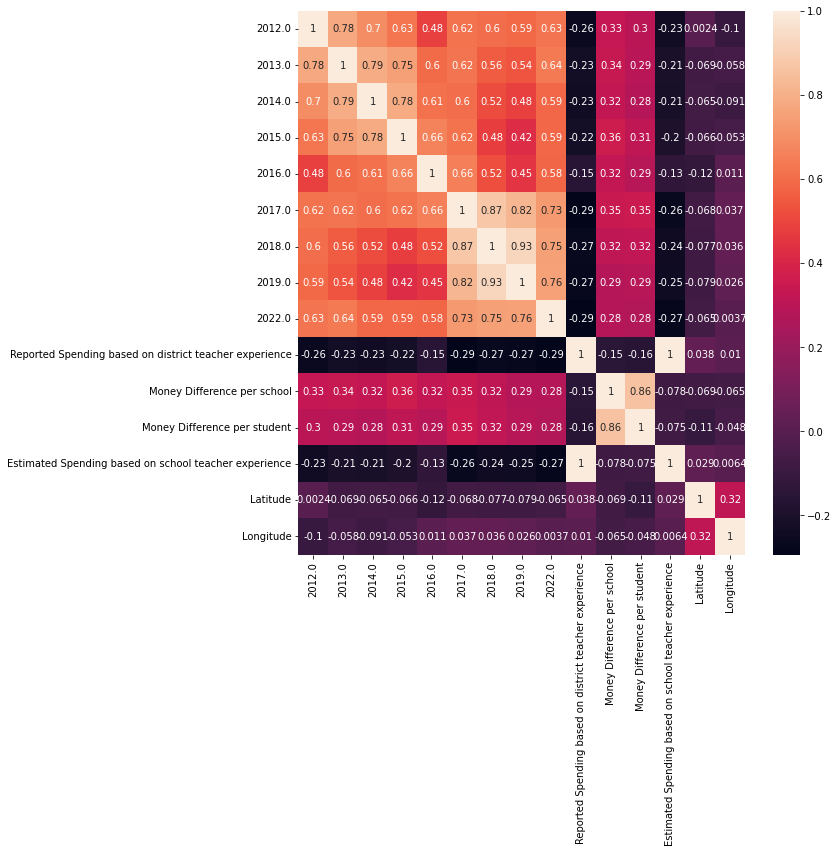

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(school_summary.corr(), annot=True)

In [32]:
pd.read_csv('/content/drive/MyDrive/Colab Data/KY EPSB/All Years/school_summary.csv')

,School Code,Level,District,School,Classification,Rating,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2022.0,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude
0,1010,HS,Adair County,Adair County High School,*Needs Improvement,Medium,55.00,54.00,69.00,71.00,72.00,60.00,57.00,58.00,54.00,"9,360.00","-12,790.00",-20.00,"9,340.00",Title 1 Eligible - Schoolwide School,37.11,-85.33
1,1014,MS,Adair County,Adair County Middle School,*Needs Improvement,Medium,48.00,53.00,62.00,63.00,68.00,65.00,73.00,78.00,61.00,"8,620.00","-8,210.00",-20.00,"8,600.00",Title 1 Eligible - Schoolwide School,37.10,-85.32
2,1016,ES,Adair County,Adair County Elementary School,*Needs Improvement,Low,63.00,63.00,63.00,60.00,69.00,71.00,67.00,72.00,54.00,"9,620.00",640.00,0.00,"9,620.00",Title 1 Eligible - Schoolwide School,37.11,-85.33
3,1020,ES,Adair County,Adair County Primary Center,*Needs Improvement,Low,NaN,NaN,NaN,NaN,NaN,NaN,67.00,72.00,54.00,"12,950.00","22,300.00",40.00,"12,990.00",Title 1 Eligible - Schoolwide School,37.11,-85.33
4,5010,ES,Allen County,Allen County Primary Center,*Needs Improvement,Low,50.00,59.00,70.00,68.00,71.00,76.00,75.00,65.00,53.00,"11,740.00","134,760.00",150.00,"11,890.00",Title 1 Eligible - Schoolwide School,36.75,-86.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,601050,ES,Woodford County,Southside Elementary School,*Distinguished,High,62.00,67.00,78.00,78.00,74.00,82.00,79.00,79.00,75.00,"10,720.00","70,760.00",140.00,"10,860.00",Title 1 Eligible - Schoolwide School,38.04,-84.72
1280,601075,ES,Woodford County,Simmons Elementary School,*Proficient,Medium,54.00,55.00,68.00,64.00,71.00,76.00,80.00,77.00,70.00,"12,060.00","-14,650.00",-30.00,"12,030.00",Title 1 Eligible - Schoolwide School,38.05,-84.75
1281,601084,HS,Woodford County,Woodford County High School,*Proficient,High,63.00,70.00,80.00,81.00,81.00,82.00,69.00,71.00,68.00,"9,490.00","28,960.00",20.00,"9,520.00",Not a Title 1 School,38.06,-84.73
1282,601090,ES,Woodford County,Huntertown Elementary School,*Distinguished,High,65.00,60.00,77.00,76.00,80.00,90.00,86.00,77.00,77.00,"10,850.00","115,620.00",250.00,"11,090.00",Title 1 Eligible - Schoolwide School,38.04,-84.71


## KY AST Goals

In [33]:
raw_goals_october_2022 = pd.read_csv('/content/drive/MyDrive/Colab Data/KY EPSB/2021-2022/progress_towards_state_goals_proficiency_2022.csv')

goals_oct_2022 = raw_goals_october_2022.loc[:,['SCHOOL CODE', 'LEVEL', 
                                               'GOAL PERFORMANCE 2022', 'GOAL PERFORMANCE 2023', 'GOAL PERFORMANCE 2024', 
                                               'GOAL PERFORMANCE 2025', 'GOAL PERFORMANCE 2026', 'GOAL PERFORMANCE 2027',
                                               'GOAL PERFORMANCE 2028', 'GOAL PERFORMANCE 2029', 'GOAL PERFORMANCE 2030']]

goals_oct_2022.columns = ['School Code', 'Level', 
                          '2022 Goal', '2023 Goal', '2024 Goal', 
                          '2025 Goal', '2026 Goal', '2027 Goal',
                          '2028 Goal', '2029 Goal', '2030 Goal']

goals_oct_2022 = goals_oct_2022.groupby(['School Code', 'Level']).mean()

In [34]:
# Converts & rounds to integers

def round_df_to_integer(df, column_list):
  for column in column_list:
    #df[column] = pd.to_numeric(df[column])
    df = df.round({column:0})
    df[column] = df[column].astype(int)
  return(df)

In [35]:
# Execute integers conversion/ round
goal_columns = ['2022 Goal', '2023 Goal', '2024 Goal', 
                '2025 Goal', '2026 Goal', '2027 Goal', 
                '2028 Goal', '2029 Goal', '2030 Goal']

goals_oct_2022 = round_df_to_integer(goals_oct_2022, goal_columns)

In [36]:
goals_oct_2022

,,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal
School Code,Level,,,,,,,,,
1010,HS,41,44,46,49,52,55,58,61,63
1014,MS,45,47,50,52,55,58,60,63,66
1016,ES,48,50,53,55,58,60,63,65,68
5010,ES,47,49,52,54,57,60,62,65,67
5015,MS,45,47,50,53,55,58,61,63,66
...,...,...,...,...,...,...,...,...,...,...
601090,ES,56,58,61,63,65,67,69,71,73
601120,ES,58,60,62,64,66,68,70,72,74
606450,ES,46,48,50,52,54,57,59,61,63


In [37]:
goals_oct_2022.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1247 entries, (1010, 'HS') to (606460, 'MS')
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   2022 Goal  1247 non-null   int64
 1   2023 Goal  1247 non-null   int64
 2   2024 Goal  1247 non-null   int64
 3   2025 Goal  1247 non-null   int64
 4   2026 Goal  1247 non-null   int64
 5   2027 Goal  1247 non-null   int64
 6   2028 Goal  1247 non-null   int64
 7   2029 Goal  1247 non-null   int64
 8   2030 Goal  1247 non-null   int64
dtypes: int64(9)
memory usage: 100.3+ KB


In [38]:
school_summary.to_csv('/content/drive/MyDrive/Colab Data/KY EPSB/All Years/school_summary.csv')

In [39]:
school_summary

,,District,School,Classification,Rating,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2022.0,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude
School Code,Level,,,,,,,,,,,,,,,,,,,,
1010,HS,Adair County,Adair County High School,*Needs Improvement,Medium,55.00,54.00,69.00,71.00,72.00,60.00,57.00,58.00,54.00,"9,360.00","-12,790.00",-20.00,"9,340.00",Title 1 Eligible - Schoolwide School,37.11,-85.33
1014,MS,Adair County,Adair County Middle School,*Needs Improvement,Medium,48.00,53.00,62.00,63.00,68.00,65.00,73.00,78.00,61.00,"8,620.00","-8,210.00",-20.00,"8,600.00",Title 1 Eligible - Schoolwide School,37.10,-85.32
1016,ES,Adair County,Adair County Elementary School,*Needs Improvement,Low,63.00,63.00,63.00,60.00,69.00,71.00,67.00,72.00,54.00,"9,620.00",640.00,0.00,"9,620.00",Title 1 Eligible - Schoolwide School,37.11,-85.33
1020,ES,Adair County,Adair County Primary Center,*Needs Improvement,Low,NaN,NaN,NaN,NaN,NaN,NaN,67.00,72.00,54.00,"12,950.00","22,300.00",40.00,"12,990.00",Title 1 Eligible - Schoolwide School,37.11,-85.33
5010,ES,Allen County,Allen County Primary Center,*Needs Improvement,Low,50.00,59.00,70.00,68.00,71.00,76.00,75.00,65.00,53.00,"11,740.00","134,760.00",150.00,"11,890.00",Title 1 Eligible - Schoolwide School,36.75,-86.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601050,ES,Woodford County,Southside Elementary School,*Distinguished,High,62.00,67.00,78.00,78.00,74.00,82.00,79.00,79.00,75.00,"10,720.00","70,760.00",140.00,"10,860.00",Title 1 Eligible - Schoolwide School,38.04,-84.72
601075,ES,Woodford County,Simmons Elementary School,*Proficient,Medium,54.00,55.00,68.00,64.00,71.00,76.00,80.00,77.00,70.00,"12,060.00","-14,650.00",-30.00,"12,030.00",Title 1 Eligible - Schoolwide School,38.05,-84.75
601084,HS,Woodford County,Woodford County High School,*Proficient,High,63.00,70.00,80.00,81.00,81.00,82.00,69.00,71.00,68.00,"9,490.00","28,960.00",20.00,"9,520.00",Not a Title 1 School,38.06,-84.73


## Slope and Intercept

In [40]:
df_slope = school_summary.copy()
df_school_details = df_slope.join(goals_oct_2022, how='left')
df_school_details.sort_index(inplace=True)
df_school_details.reset_index(drop=False, inplace=True)

In [41]:
df_school_details.iloc[:, 6:14].values[0]

array([55., 54., 69., 71., 72., 60., 57., 58.])

In [42]:
school_summary.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1284 entries, (1010, 'HS') to (601120, 'ES')
Data columns (total 20 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   District                                                1284 non-null   object 
 1   School                                                  1284 non-null   object 
 2   Classification                                          1161 non-null   object 
 3   Rating                                                  1275 non-null   object 
 4   2012.0                                                  1180 non-null   float64
 5   2013.0                                                  1183 non-null   float64
 6   2014.0                                                  1191 non-null   float64
 7   2015.0                                                  1200 non-null   float64
 8   2016.0           

In [43]:
df_school_details.index

RangeIndex(start=0, stop=1284, step=1)

In [44]:
# Find the slope, intercept for each school based on pre-covid data
slopes = []
intercepts = []  

for i in df_school_details.index:
  x_values = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
  y_values = df_school_details.loc[:, [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]].values[i]
  slope, init_intercept = np.polyfit(x_values, y_values, 1)
  score_2022 = df_school_details[2022][i]
  intercept = score_2022 - (slope * 2022) 
   
  slopes.append(slope)
  intercepts.append(intercept)

# Put slopes, intercepts into school_summary
df_school_details['Proficiency slope'] = slopes
df_school_details['Proficiency intercept'] = intercepts

In [45]:
df_school_details[df_school_details['Proficiency slope'] < 0]

,School Code,Level,District,School,Classification,Rating,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2022.0,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal,Proficiency slope,Proficiency intercept
6,5020,HS,Allen County,Allen County-Scottsville High School,*Needs Improvement,Medium,51.00,61.00,72.00,68.00,72.00,62.00,57.00,56.00,61.00,"12,840.00","122,800.00",140.00,"12,980.00",Title 1 Eligible - Schoolwide School,36.75,-86.22,39.00,42.00,45.00,48.00,50.00,53.00,56.00,59.00,62.00,-0.13,325.79
10,11020,HS,Anderson County,Anderson County High School,*Proficient,High,60.00,61.00,69.00,74.00,75.00,65.00,56.00,62.00,68.00,"8,380.00","-61,800.00",-60.00,"8,320.00",Title 1 Eligible - No Program,38.02,-84.91,48.00,50.00,53.00,55.00,58.00,60.00,63.00,65.00,68.00,-0.26,597.57
23,13011,HS,Augusta Independent,Augusta Independent School,*Needs Improvement,Low,58.00,54.00,70.00,76.00,74.00,68.00,57.00,51.00,41.00,"10,850.00","13,200.00",50.00,"10,900.00",Title 1 Eligible - Schoolwide School,38.77,-84.00,37.00,40.00,43.00,46.00,49.00,52.00,55.00,58.00,61.00,-0.50,"1,052.00"
55,31040,HS,Bell County,Bell County High School,*Needs Improvement,Medium,51.00,58.00,69.00,70.00,75.00,69.00,56.00,50.00,61.00,"9,820.00","12,620.00",20.00,"9,840.00",Title 1 Eligible - No Program,36.71,-83.69,38.00,41.00,44.00,47.00,50.00,53.00,56.00,59.00,62.00,-0.14,349.86
79,35020,MS,Boone County,Rector A. Jones Middle School,*Needs Improvement,Low,47.00,48.00,58.00,57.00,60.00,52.00,49.00,48.00,38.00,"8,850.00","-147,180.00",-210.00,"8,640.00",Title 1 Eligible - Schoolwide School,38.99,-84.62,22.00,26.00,30.00,33.00,37.00,41.00,45.00,48.00,52.00,-0.04,110.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,575074,HS,Washington County,Washington County High School,*Needs Improvement,Medium,49.00,62.00,68.00,70.00,71.00,45.00,54.00,46.00,62.00,"9,710.00","10,140.00",20.00,"9,730.00",Title 1 Eligible - Schoolwide School,37.71,-85.21,34.00,37.00,40.00,43.00,46.00,50.00,53.00,56.00,59.00,-1.54,"3,167.21"
1247,581200,HS,Wayne County,Wayne County High School,*Needs Improvement,Low,58.00,70.00,74.00,76.00,70.00,60.00,61.00,52.00,51.00,"9,020.00","-1,290.00",-10.00,"9,020.00",Title 1 Eligible - No Program,36.83,-84.87,39.00,42.00,45.00,48.00,51.00,54.00,57.00,60.00,62.00,-1.61,"3,300.64"
1266,591430,HS,Whitley County,Whitley County High School,*Needs Improvement,Medium,52.00,65.00,72.00,74.00,77.00,64.00,58.00,57.00,59.00,"10,010.00","-108,950.00",-100.00,"9,900.00",Title 1 Eligible - Schoolwide School,36.78,-84.15,45.00,48.00,51.00,53.00,56.00,58.00,61.00,64.00,66.00,-0.25,564.50
1273,593030,HS,Williamstown Independent,Williamstown Sr. High,*Proficient,High,67.00,68.00,72.00,75.00,71.00,69.00,77.00,57.00,68.00,"9,290.00","48,310.00",210.00,"9,500.00",Title 1 Eligible - No Program,38.65,-84.57,50.00,53.00,55.00,57.00,60.00,62.00,65.00,67.00,69.00,-0.45,982.71


In [46]:
df_school_details

,School Code,Level,District,School,Classification,Rating,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2022.0,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal,Proficiency slope,Proficiency intercept
0,1010,HS,Adair County,Adair County High School,*Needs Improvement,Medium,55.00,54.00,69.00,71.00,72.00,60.00,57.00,58.00,54.00,"9,360.00","-12,790.00",-20.00,"9,340.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,41.00,44.00,46.00,49.00,52.00,55.00,58.00,61.00,63.00,0.12,-186.71
1,1014,MS,Adair County,Adair County Middle School,*Needs Improvement,Medium,48.00,53.00,62.00,63.00,68.00,65.00,73.00,78.00,61.00,"8,620.00","-8,210.00",-20.00,"8,600.00",Title 1 Eligible - Schoolwide School,37.10,-85.32,45.00,47.00,50.00,52.00,55.00,58.00,60.00,63.00,66.00,3.86,"-7,738.14"
2,1016,ES,Adair County,Adair County Elementary School,*Needs Improvement,Low,63.00,63.00,63.00,60.00,69.00,71.00,67.00,72.00,54.00,"9,620.00",640.00,0.00,"9,620.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,48.00,50.00,53.00,55.00,58.00,60.00,63.00,65.00,68.00,1.38,"-2,738.29"
3,1020,ES,Adair County,Adair County Primary Center,*Needs Improvement,Low,NaN,NaN,NaN,NaN,NaN,NaN,67.00,72.00,54.00,"12,950.00","22,300.00",40.00,"12,990.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5010,ES,Allen County,Allen County Primary Center,*Needs Improvement,Low,50.00,59.00,70.00,68.00,71.00,76.00,75.00,65.00,53.00,"11,740.00","134,760.00",150.00,"11,890.00",Title 1 Eligible - Schoolwide School,36.75,-86.22,47.00,49.00,52.00,54.00,57.00,60.00,62.00,65.00,67.00,2.45,"-4,905.71"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,601050,ES,Woodford County,Southside Elementary School,*Distinguished,High,62.00,67.00,78.00,78.00,74.00,82.00,79.00,79.00,75.00,"10,720.00","70,760.00",140.00,"10,860.00",Title 1 Eligible - Schoolwide School,38.04,-84.72,56.00,58.00,60.00,62.00,64.00,66.00,68.00,70.00,72.00,2.23,"-4,426.36"
1280,601075,ES,Woodford County,Simmons Elementary School,*Proficient,Medium,54.00,55.00,68.00,64.00,71.00,76.00,80.00,77.00,70.00,"12,060.00","-14,650.00",-30.00,"12,030.00",Title 1 Eligible - Schoolwide School,38.05,-84.75,53.00,55.00,57.00,59.00,62.00,64.00,66.00,68.00,71.00,3.77,"-7,560.64"
1281,601084,HS,Woodford County,Woodford County High School,*Proficient,High,63.00,70.00,80.00,81.00,81.00,82.00,69.00,71.00,68.00,"9,490.00","28,960.00",20.00,"9,520.00",Not a Title 1 School,38.06,-84.73,54.00,56.00,58.00,60.00,62.00,65.00,67.00,69.00,71.00,0.68,"-1,304.07"
1282,601090,ES,Woodford County,Huntertown Elementary School,*Distinguished,High,65.00,60.00,77.00,76.00,80.00,90.00,86.00,77.00,77.00,"10,850.00","115,620.00",250.00,"11,090.00",Title 1 Eligible - Schoolwide School,38.04,-84.71,56.00,58.00,61.00,63.00,65.00,67.00,69.00,71.00,73.00,3.06,"-6,109.36"


In [47]:
df_school_details.to_csv('/content/drive/MyDrive/Colab Data/KY EPSB/All Years/detailed_df_by_school.csv', index=False)

In [48]:
pd.read_csv('/content/drive/MyDrive/Colab Data/KY EPSB/All Years/detailed_df_by_school.csv')

,School Code,Level,District,School,Classification,Rating,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2022.0,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal,Proficiency slope,Proficiency intercept
0,1010,HS,Adair County,Adair County High School,*Needs Improvement,Medium,55.00,54.00,69.00,71.00,72.00,60.00,57.00,58.00,54.00,"9,360.00","-12,790.00",-20.00,"9,340.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,41.00,44.00,46.00,49.00,52.00,55.00,58.00,61.00,63.00,0.12,-186.71
1,1014,MS,Adair County,Adair County Middle School,*Needs Improvement,Medium,48.00,53.00,62.00,63.00,68.00,65.00,73.00,78.00,61.00,"8,620.00","-8,210.00",-20.00,"8,600.00",Title 1 Eligible - Schoolwide School,37.10,-85.32,45.00,47.00,50.00,52.00,55.00,58.00,60.00,63.00,66.00,3.86,"-7,738.14"
2,1016,ES,Adair County,Adair County Elementary School,*Needs Improvement,Low,63.00,63.00,63.00,60.00,69.00,71.00,67.00,72.00,54.00,"9,620.00",640.00,0.00,"9,620.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,48.00,50.00,53.00,55.00,58.00,60.00,63.00,65.00,68.00,1.38,"-2,738.29"
3,1020,ES,Adair County,Adair County Primary Center,*Needs Improvement,Low,NaN,NaN,NaN,NaN,NaN,NaN,67.00,72.00,54.00,"12,950.00","22,300.00",40.00,"12,990.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5010,ES,Allen County,Allen County Primary Center,*Needs Improvement,Low,50.00,59.00,70.00,68.00,71.00,76.00,75.00,65.00,53.00,"11,740.00","134,760.00",150.00,"11,890.00",Title 1 Eligible - Schoolwide School,36.75,-86.22,47.00,49.00,52.00,54.00,57.00,60.00,62.00,65.00,67.00,2.45,"-4,905.71"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,601050,ES,Woodford County,Southside Elementary School,*Distinguished,High,62.00,67.00,78.00,78.00,74.00,82.00,79.00,79.00,75.00,"10,720.00","70,760.00",140.00,"10,860.00",Title 1 Eligible - Schoolwide School,38.04,-84.72,56.00,58.00,60.00,62.00,64.00,66.00,68.00,70.00,72.00,2.23,"-4,426.36"
1280,601075,ES,Woodford County,Simmons Elementary School,*Proficient,Medium,54.00,55.00,68.00,64.00,71.00,76.00,80.00,77.00,70.00,"12,060.00","-14,650.00",-30.00,"12,030.00",Title 1 Eligible - Schoolwide School,38.05,-84.75,53.00,55.00,57.00,59.00,62.00,64.00,66.00,68.00,71.00,3.77,"-7,560.64"
1281,601084,HS,Woodford County,Woodford County High School,*Proficient,High,63.00,70.00,80.00,81.00,81.00,82.00,69.00,71.00,68.00,"9,490.00","28,960.00",20.00,"9,520.00",Not a Title 1 School,38.06,-84.73,54.00,56.00,58.00,60.00,62.00,65.00,67.00,69.00,71.00,0.68,"-1,304.07"
1282,601090,ES,Woodford County,Huntertown Elementary School,*Distinguished,High,65.00,60.00,77.00,76.00,80.00,90.00,86.00,77.00,77.00,"10,850.00","115,620.00",250.00,"11,090.00",Title 1 Eligible - Schoolwide School,38.04,-84.71,56.00,58.00,61.00,63.00,65.00,67.00,69.00,71.00,73.00,3.06,"-6,109.36"


In [49]:
df_school_details

,School Code,Level,District,School,Classification,Rating,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2022.0,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal,Proficiency slope,Proficiency intercept
0,1010,HS,Adair County,Adair County High School,*Needs Improvement,Medium,55.00,54.00,69.00,71.00,72.00,60.00,57.00,58.00,54.00,"9,360.00","-12,790.00",-20.00,"9,340.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,41.00,44.00,46.00,49.00,52.00,55.00,58.00,61.00,63.00,0.12,-186.71
1,1014,MS,Adair County,Adair County Middle School,*Needs Improvement,Medium,48.00,53.00,62.00,63.00,68.00,65.00,73.00,78.00,61.00,"8,620.00","-8,210.00",-20.00,"8,600.00",Title 1 Eligible - Schoolwide School,37.10,-85.32,45.00,47.00,50.00,52.00,55.00,58.00,60.00,63.00,66.00,3.86,"-7,738.14"
2,1016,ES,Adair County,Adair County Elementary School,*Needs Improvement,Low,63.00,63.00,63.00,60.00,69.00,71.00,67.00,72.00,54.00,"9,620.00",640.00,0.00,"9,620.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,48.00,50.00,53.00,55.00,58.00,60.00,63.00,65.00,68.00,1.38,"-2,738.29"
3,1020,ES,Adair County,Adair County Primary Center,*Needs Improvement,Low,NaN,NaN,NaN,NaN,NaN,NaN,67.00,72.00,54.00,"12,950.00","22,300.00",40.00,"12,990.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5010,ES,Allen County,Allen County Primary Center,*Needs Improvement,Low,50.00,59.00,70.00,68.00,71.00,76.00,75.00,65.00,53.00,"11,740.00","134,760.00",150.00,"11,890.00",Title 1 Eligible - Schoolwide School,36.75,-86.22,47.00,49.00,52.00,54.00,57.00,60.00,62.00,65.00,67.00,2.45,"-4,905.71"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,601050,ES,Woodford County,Southside Elementary School,*Distinguished,High,62.00,67.00,78.00,78.00,74.00,82.00,79.00,79.00,75.00,"10,720.00","70,760.00",140.00,"10,860.00",Title 1 Eligible - Schoolwide School,38.04,-84.72,56.00,58.00,60.00,62.00,64.00,66.00,68.00,70.00,72.00,2.23,"-4,426.36"
1280,601075,ES,Woodford County,Simmons Elementary School,*Proficient,Medium,54.00,55.00,68.00,64.00,71.00,76.00,80.00,77.00,70.00,"12,060.00","-14,650.00",-30.00,"12,030.00",Title 1 Eligible - Schoolwide School,38.05,-84.75,53.00,55.00,57.00,59.00,62.00,64.00,66.00,68.00,71.00,3.77,"-7,560.64"
1281,601084,HS,Woodford County,Woodford County High School,*Proficient,High,63.00,70.00,80.00,81.00,81.00,82.00,69.00,71.00,68.00,"9,490.00","28,960.00",20.00,"9,520.00",Not a Title 1 School,38.06,-84.73,54.00,56.00,58.00,60.00,62.00,65.00,67.00,69.00,71.00,0.68,"-1,304.07"
1282,601090,ES,Woodford County,Huntertown Elementary School,*Distinguished,High,65.00,60.00,77.00,76.00,80.00,90.00,86.00,77.00,77.00,"10,850.00","115,620.00",250.00,"11,090.00",Title 1 Eligible - Schoolwide School,38.04,-84.71,56.00,58.00,61.00,63.00,65.00,67.00,69.00,71.00,73.00,3.06,"-6,109.36"


In [50]:
df_school_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 33 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   School Code                                             1284 non-null   int64  
 1   Level                                                   1284 non-null   object 
 2   District                                                1284 non-null   object 
 3   School                                                  1284 non-null   object 
 4   Classification                                          1161 non-null   object 
 5   Rating                                                  1275 non-null   object 
 6   2012.0                                                  1180 non-null   float64
 7   2013.0                                                  1183 non-null   float64
 8   2014.0                                

# School Graphs

In [51]:
#df_school_details.dropna(inplace=True)
df_school_details.sort_values(by=['District', 'School', 'Level'], inplace=True)
df_school_details.reset_index(drop=True, inplace=True)

In [52]:
def test_trend(school_index):
  x_trend = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
  y_trend = df_school_details.loc[school_index, [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]].values
  sns.regplot(x = x_trend, y = y_trend, fit_reg=True, ci=None)
  
  # 2022 Test score
  x_score_2022 = [2022]
  y_score_2022 = df_school_details.loc[school_index,2022]
  plt.scatter(x_score_2022, y_score_2022)

  school = df_school_details.at[school_index, 'School']
  district = df_school_details.at[school_index, 'District']

  plt.xlim(2012, 2023)
  plt.ylim(15, 115)
  plt.xlabel('Year')
  plt.ylabel('Proficiency Scores')
  plt.title(("%s \n"%school)+ ("District: %s \n Test Trend"%district))
  plt.gca().legend(('Pre-covid Test Trend','Test scores'), loc='best')
  plt.show()

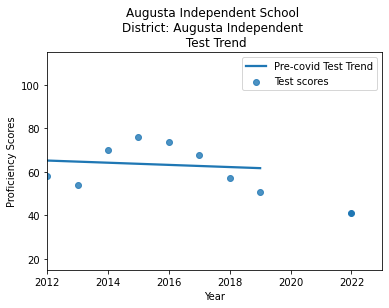

In [53]:
test_trend(23)

In [54]:
def test_scores(school_index):
  x_scores = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022]
  y_scores = df_school_details.loc[school_index,[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022]].values
  #y_scores = df_school_details.iloc[[school_index],4:13].values[0]
  plt.scatter(x_scores, y_scores, marker="D")

  school = df_school_details.at[school_index, 'School']
  district = df_school_details.at[school_index, 'District']

  plt.xlim(2011, 2023)
  plt.ylim(15, 115)
  plt.xlabel('Year')
  plt.ylabel('Proficiency Scores')
  plt.title(("%s \n"%school)+ ("District: %s \n Test Scores"%district))
  plt.gca().legend(('Test Scores',), loc='best')
  plt.show()

In [55]:
df_school_details.iloc[54,4:13]

Classification    *Needs Improvement
Rating                           Low
2012.0                         60.00
2013.0                         51.00
2014.0                         54.00
2015.0                         51.00
2016.0                         71.00
2017.0                         68.00
2018.0                         67.00
Name: 54, dtype: object

In [56]:
df_school_details.index

RangeIndex(start=0, stop=1284, step=1)

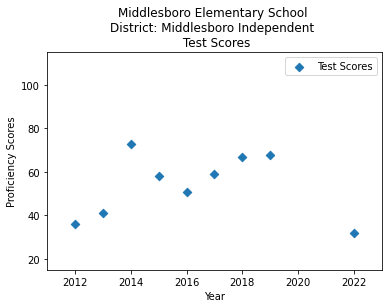

In [57]:
test_scores(949)

In [58]:
def score_predictions(school_index):
  x_pred = [2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
  slope = df_school_details.at[school_index, 'Proficiency slope']
  intercept = df_school_details.at[school_index, 'Proficiency intercept']
  y_pred = [slope * year + intercept for year in x_pred]
  plt.plot(x_pred, y_pred, linestyle='dashed')
  
  # 2022 Test score
  x_score_2022 = [2022]
  y_score_2022 = df_school_details.loc[school_index, [2022]].values
  plt.scatter(x_score_2022, y_score_2022, marker="D")


  school = df_school_details.at[school_index, 'School']
  district = df_school_details.at[school_index, 'District']
  plt.xlim(2021, 2030)
  plt.ylim(15, 115)
  plt.xlabel('Year')
  plt.ylabel('Proficiency Scores')
  plt.title(("%s \n"%school)+ ("District: %s \n Test Predictions \n (Based on school trend and 2022 test score)"%district))
  plt.gca().legend(('Predictions',), loc='best')
  plt.show()

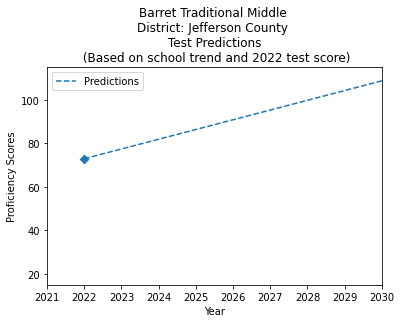

In [59]:
score_predictions(580)

In [60]:
def school_goals(school_index):
  # Test Scores - scatter
  x_scores = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022]
  y_scores = df_school_details.loc[[school_index],[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022]].values
  #y_scores = df_school_details.iloc[[school_index],4:13].values[0]
  plt.scatter(x_scores, y_scores)
  
  # School Goals
  x_goals = [2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
  y_goals = df_school_details.loc[[school_index],['2022 Goal','2023 Goal','2024 Goal','2025 Goal','2026 Goal','2027 Goal','2028 Goal','2029 Goal','2030 Goal']].values
  #y_goals = df_school_details.iloc[[school_index],20:30].values[0]
  plt.scatter(x_goals, y_goals, marker="x")

  school = df_school_details.at[school_index, 'School']
  district = df_school_details.at[school_index, 'District']

  plt.xlim(2012, 2030)
  plt.ylim(15, 115)
  plt.xlabel('Year')
  plt.ylabel('Proficiency Scores')
  plt.title(("%s \n"%school)+ ("District: %s \n Test Scores and Goals"%district))
  plt.gca().legend(('Test Scores', 'School Goals (published Oct 2022)',), loc='best')
  plt.show()

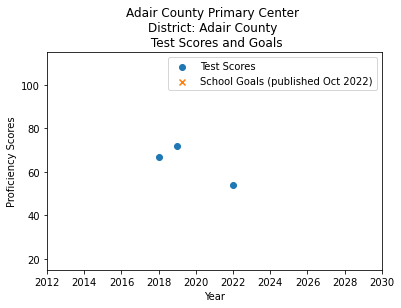

In [61]:
school_goals(3)

In [62]:
df_school_details.loc[5, [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]].values


#df_school_details.loc[17, [2022]].values


array([50.0, 59.0, 70.0, 68.0, 71.0, 76.0, 75.0, 65.0], dtype=object)

In [63]:
def school_combin(school_index):
  # Test Trend - precovid
  x_trend = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
  y_trend = df_school_details.loc[school_index,[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]].values
  #y_trend = df_school_details.iloc[[school_index],4:12].values[0]
  sns.regplot(x = x_trend, y = y_trend, fit_reg=True, ci=None, marker="D")
  
  # Test Scores - scatter
  x_scores = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022]
  y_scores = df_school_details.loc[school_index,[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022]].values
  plt.scatter(x_scores, y_scores)

  # Predict future scores
  x_pred = [2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
  slope = df_school_details.at[school_index, 'Proficiency slope']
  intercept = df_school_details.at[school_index, 'Proficiency intercept']
  y_pred = [slope * year + intercept for year in x_pred]
  plt.plot(x_pred, y_pred, linestyle='dashed')


  # Labels
  school = df_school_details.at[school_index, 'School']
  district = df_school_details.at[school_index, 'District']
  plt.xlim(2012, 2030)
  plt.ylim(15, 115)
  plt.xlabel('Year')
  plt.ylabel('Proficiency Scores')
  plt.title(("%s \n"%school)+ ("District: %s \n Test Trend and Predictions"%district))
  plt.gca().legend(('Test Trend (pre-covid)','Prediction Line', 'Test Scores'), loc='best')
  plt.show()

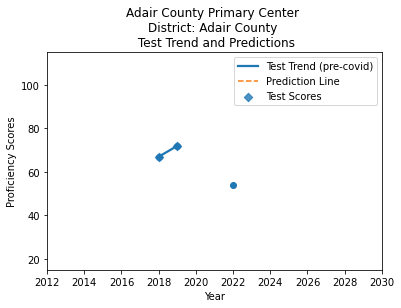

In [64]:
school_combin(3)

In [65]:
df_school_details[df_school_details['School'].str.contains("Manual")] 


,School Code,Level,District,School,Classification,Rating,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2022.0,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal,Proficiency slope,Proficiency intercept
710,275200,HS,Jefferson County,duPont Manual High,Distinguished,Very High,87.00,87.00,92.00,92.00,91.00,100.00,105.00,102.00,99.00,"10,780.00","1,037,600.00",550.00,"11,330.00",Not a Title 1 School,38.22,-85.76,83.00,83.00,84.00,85.00,86.00,87.00,88.00,88.00,89.00,2.60,"-5,148.57"


In [66]:
df_school_details[df_school_details['School'].str.contains("Male")] 

,School Code,Level,District,School,Classification,Rating,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2022.0,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal,Proficiency slope,Proficiency intercept
652,275047,HS,Jefferson County,Louisville Male High,*Distinguished,High,77.00,79.00,86.00,86.00,89.00,91.00,82.00,78.00,71.00,"8,880.00","625,680.00",340.00,"9,230.00",Title 1 Eligible - No Program,38.18,-85.72,55.00,57.00,60.00,62.00,64.00,66.00,68.00,70.00,72.00,0.48,-891.86


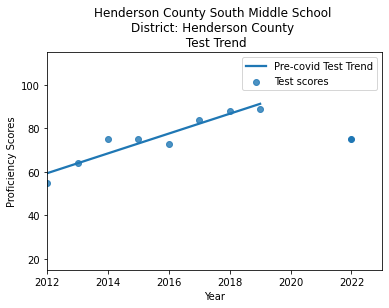

In [67]:
test_trend(539)

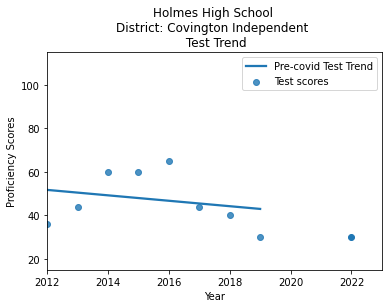

In [68]:
test_trend(249)

In [69]:
df_school_details[df_school_details['District']=='Jefferson County'].sort_values('Reported Spending based on district teacher experience')

,School Code,Level,District,School,Classification,Rating,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2022.0,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal,Proficiency slope,Proficiency intercept
652,275047,HS,Jefferson County,Louisville Male High,*Distinguished,High,77.00,79.00,86.00,86.00,89.00,91.00,82.00,78.00,71.00,"8,880.00","625,680.00",340.00,"9,230.00",Title 1 Eligible - No Program,38.18,-85.72,55.00,57.00,60.00,62.00,64.00,66.00,68.00,70.00,72.00,0.48,-891.86
672,275219,MS,Jefferson County,Ramsey Middle,*Needs Improvement,Low,51.00,48.00,62.00,58.00,58.00,61.00,64.00,59.00,42.00,"9,180.00","-61,700.00",-70.00,"9,120.00",Title 1 Eligible - Schoolwide School,38.15,-85.55,32.00,35.00,38.00,41.00,45.00,48.00,51.00,54.00,58.00,1.58,"-3,159.50"
602,275119,MS,Jefferson County,Crosby Middle,*Needs Improvement,Medium,62.00,59.00,66.00,66.00,64.00,74.00,77.00,74.00,57.00,"9,300.00","406,940.00",320.00,"9,620.00",Title 1 Eligible - No Program,38.24,-85.56,48.00,50.00,53.00,55.00,58.00,60.00,63.00,65.00,68.00,2.33,"-4,661.00"
660,275340,MS,Jefferson County,Meyzeek Middle,*Distinguished,High,60.00,61.00,68.00,70.00,69.00,82.00,83.00,82.00,71.00,"9,400.00","163,500.00",150.00,"9,550.00",Title 1 Eligible - No Program,38.24,-85.75,55.00,57.00,59.00,61.00,64.00,66.00,68.00,70.00,72.00,3.63,"-7,270.79"
622,275013,ES,Jefferson County,Greathouse/Shryock Traditional,Distinguished,Very High,82.00,83.00,89.00,92.00,94.00,100.00,109.00,108.00,98.00,"9,520.00","160,160.00",270.00,"9,790.00",Not a Title 1 School,38.23,-85.62,88.00,89.00,89.00,90.00,90.00,91.00,91.00,92.00,93.00,4.13,"-8,254.79"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,275092,ES,Jefferson County,Crums Lane Elementary,*Needs Improvement,Low,56.00,49.00,61.00,63.00,70.00,51.00,56.00,50.00,45.00,"17,170.00","-54,310.00",-130.00,"17,040.00",Title 1 Eligible - Schoolwide School,38.19,-85.84,27.00,31.00,34.00,38.00,41.00,45.00,48.00,52.00,55.00,-0.36,767.14
690,275590,MS,Jefferson County,The Academy @ Shawnee,Needs Improvement,Very Low,NaN,NaN,86.00,62.00,73.00,66.00,66.00,64.00,26.00,"18,760.00","-246,020.00",-450.00,"18,310.00",NaN,NaN,NaN,33.00,36.00,39.00,42.00,45.00,49.00,52.00,55.00,58.00,NaN,NaN
689,275590,HS,Jefferson County,The Academy @ Shawnee,Needs Improvement,Very Low,28.00,33.00,56.00,59.00,64.00,30.00,30.00,37.00,38.00,"18,760.00","-246,020.00",-450.00,"18,310.00",Title 1 Eligible - Schoolwide School,38.26,-85.82,29.00,32.00,36.00,39.00,43.00,46.00,49.00,53.00,56.00,-0.30,639.79
574,275175,ES,Jefferson County,Alex R. Kennedy Elementary,*Needs Improvement,Low,NaN,NaN,NaN,NaN,72.00,55.00,77.00,69.00,50.00,"19,970.00","2,180.00",-0.00,"19,970.00",Title 1 Eligible - Schoolwide School,38.22,-85.60,42.00,44.00,47.00,50.00,53.00,55.00,58.00,61.00,64.00,NaN,NaN


In [70]:
df_school_details[df_school_details['School'].str.contains("Atherton")] 

,School Code,Level,District,School,Classification,Rating,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2022.0,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal,Proficiency slope,Proficiency intercept
575,275018,HS,Jefferson County,Atherton High,*Distinguished,High,60.00,66.00,77.00,80.00,83.00,76.00,79.00,80.00,73.00,"10,400.00","563,120.00",420.00,"10,820.00",Title 1 Eligible - No Program,38.21,-85.69,54.00,56.00,58.00,60.00,63.00,65.00,67.00,69.00,71.00,2.44,"-4,861.64"


In [71]:
df_school_details[df_school_details['School'].str.contains("Fern Creek High")] 

,School Code,Level,District,School,Classification,Rating,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2022.0,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal,Proficiency slope,Proficiency intercept
615,275012,HS,Jefferson County,Fern Creek High,*Needs Improvement,Low,50.00,56.00,71.00,72.00,74.00,61.00,41.00,40.00,44.00,"10,410.00","-287,380.00",-200.00,"10,210.00",Title 1 Eligible - Schoolwide School,38.16,-85.59,24.00,27.00,31.00,35.00,38.00,42.00,45.00,49.00,53.00,-2.06,"4,208.36"


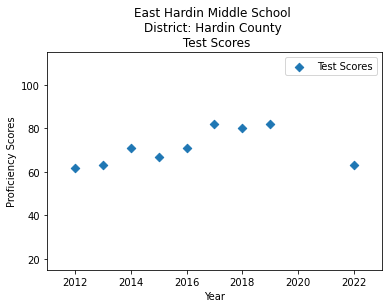

In [72]:
test_scores(477)

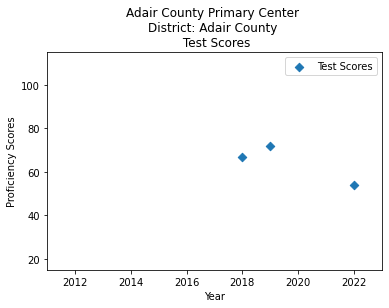

In [73]:
test_scores(3)

In [74]:
df_school_details[df_school_details.isnull().any(axis=1)]

,School Code,Level,District,School,Classification,Rating,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2022.0,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal,Proficiency slope,Proficiency intercept
3,1020,ES,Adair County,Adair County Primary Center,*Needs Improvement,Low,NaN,NaN,NaN,NaN,NaN,NaN,67.00,72.00,54.00,"12,950.00","22,300.00",40.00,"12,990.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5060,ES,Allen County,Allen County Intermediate Center,NaN,Low,56.00,58.00,63.00,70.00,71.00,72.00,71.00,75.00,52.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.00,48.00,50.00,53.00,56.00,58.00,61.00,63.00,66.00,2.69,"-5,388.14"
8,6010,ES,Anchorage Independent,Anchorage Independent Public School,Distinguished,Very High,71.00,81.00,85.00,79.00,85.00,96.00,103.00,105.00,98.00,"19,950.00","123,650.00",340.00,"20,280.00",NaN,NaN,NaN,83.00,84.00,85.00,86.00,86.00,87.00,88.00,89.00,90.00,4.61,"-9,217.64"
22,13011,ES,Augusta Independent,Augusta Independent School,*Needs Improvement,Low,46.00,58.00,60.00,65.00,73.00,73.00,58.00,62.00,33.00,"10,850.00","13,200.00",50.00,"10,900.00",NaN,NaN,NaN,35.00,38.00,41.00,44.00,47.00,50.00,54.00,57.00,60.00,1.89,"-3,794.36"
24,13011,MS,Augusta Independent,Augusta Independent School,*Needs Improvement,Low,47.00,46.00,62.00,63.00,58.00,52.00,54.00,54.00,52.00,"10,850.00","13,200.00",50.00,"10,900.00",NaN,NaN,NaN,27.00,31.00,34.00,38.00,41.00,45.00,48.00,51.00,55.00,0.64,"-1,247.86"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,592012,ES,Williamsburg Independent,Williamsburg City School,*Needs Improvement,Medium,62.00,62.00,52.00,65.00,64.00,69.00,63.00,69.00,55.00,"12,240.00","62,760.00",80.00,"12,330.00",NaN,NaN,NaN,41.00,43.00,46.00,49.00,52.00,55.00,58.00,60.00,63.00,1.24,"-2,448.43"
1270,592012,MS,Williamsburg Independent,Williamsburg City School,*Needs Improvement,Low,60.00,56.00,52.00,69.00,58.00,57.00,61.00,70.00,55.00,"12,240.00","62,760.00",80.00,"12,330.00",NaN,NaN,NaN,38.00,41.00,44.00,47.00,50.00,53.00,56.00,59.00,62.00,1.18,"-2,328.07"
1274,595310,ES,Wolfe County,Campton Elementary School,NaN,Low,44.00,61.00,65.00,67.00,69.00,63.00,58.00,59.00,46.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.00,36.00,39.00,43.00,46.00,49.00,52.00,55.00,59.00,1.02,"-2,024.14"
1275,595205,ES,Wolfe County,Red River Valley Elementary School,Needs Improvement,Very Low,57.00,43.00,70.00,65.00,83.00,64.00,70.00,67.00,30.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.00,31.00,35.00,38.00,42.00,45.00,48.00,52.00,55.00,2.44,"-4,904.64"


In [75]:
df_school_details

,School Code,Level,District,School,Classification,Rating,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2022.0,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal,Proficiency slope,Proficiency intercept
0,1016,ES,Adair County,Adair County Elementary School,*Needs Improvement,Low,63.00,63.00,63.00,60.00,69.00,71.00,67.00,72.00,54.00,"9,620.00",640.00,0.00,"9,620.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,48.00,50.00,53.00,55.00,58.00,60.00,63.00,65.00,68.00,1.38,"-2,738.29"
1,1010,HS,Adair County,Adair County High School,*Needs Improvement,Medium,55.00,54.00,69.00,71.00,72.00,60.00,57.00,58.00,54.00,"9,360.00","-12,790.00",-20.00,"9,340.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,41.00,44.00,46.00,49.00,52.00,55.00,58.00,61.00,63.00,0.12,-186.71
2,1014,MS,Adair County,Adair County Middle School,*Needs Improvement,Medium,48.00,53.00,62.00,63.00,68.00,65.00,73.00,78.00,61.00,"8,620.00","-8,210.00",-20.00,"8,600.00",Title 1 Eligible - Schoolwide School,37.10,-85.32,45.00,47.00,50.00,52.00,55.00,58.00,60.00,63.00,66.00,3.86,"-7,738.14"
3,1020,ES,Adair County,Adair County Primary Center,*Needs Improvement,Low,NaN,NaN,NaN,NaN,NaN,NaN,67.00,72.00,54.00,"12,950.00","22,300.00",40.00,"12,990.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5060,ES,Allen County,Allen County Intermediate Center,NaN,Low,56.00,58.00,63.00,70.00,71.00,72.00,71.00,75.00,52.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.00,48.00,50.00,53.00,56.00,58.00,61.00,63.00,66.00,2.69,"-5,388.14"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,601090,ES,Woodford County,Huntertown Elementary School,*Distinguished,High,65.00,60.00,77.00,76.00,80.00,90.00,86.00,77.00,77.00,"10,850.00","115,620.00",250.00,"11,090.00",Title 1 Eligible - Schoolwide School,38.04,-84.71,56.00,58.00,61.00,63.00,65.00,67.00,69.00,71.00,73.00,3.06,"-6,109.36"
1280,601120,ES,Woodford County,Northside Elementary School,*Proficient,Medium,64.00,63.00,71.00,70.00,60.00,75.00,73.00,82.00,69.00,"12,170.00","47,890.00",150.00,"12,320.00",Title 1 Eligible - Schoolwide School,38.15,-84.68,58.00,60.00,62.00,64.00,66.00,68.00,70.00,72.00,74.00,2.12,"-4,215.71"
1281,601075,ES,Woodford County,Simmons Elementary School,*Proficient,Medium,54.00,55.00,68.00,64.00,71.00,76.00,80.00,77.00,70.00,"12,060.00","-14,650.00",-30.00,"12,030.00",Title 1 Eligible - Schoolwide School,38.05,-84.75,53.00,55.00,57.00,59.00,62.00,64.00,66.00,68.00,71.00,3.77,"-7,560.64"
1282,601050,ES,Woodford County,Southside Elementary School,*Distinguished,High,62.00,67.00,78.00,78.00,74.00,82.00,79.00,79.00,75.00,"10,720.00","70,760.00",140.00,"10,860.00",Title 1 Eligible - Schoolwide School,38.04,-84.72,56.00,58.00,60.00,62.00,64.00,66.00,68.00,70.00,72.00,2.23,"-4,426.36"


In [76]:
df_school_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 33 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   School Code                                             1284 non-null   int64  
 1   Level                                                   1284 non-null   object 
 2   District                                                1284 non-null   object 
 3   School                                                  1284 non-null   object 
 4   Classification                                          1161 non-null   object 
 5   Rating                                                  1275 non-null   object 
 6   2012.0                                                  1180 non-null   float64
 7   2013.0                                                  1183 non-null   float64
 8   2014.0                                

# Aggregate District Data

In [77]:
agg_district_data = predict_df.groupby(['District']).agg({'Proficiency Rate': ['mean', 'min', 'max'],
                                      'Reported Spending per student': ['mean'],
                                      'Money Difference per school': ['min', 'max']
                                       })

agg_district_data.columns = ['Average Proficiency Score', 
                             'Minimum Proficiency Score',
                             'Maximum Proficiency Score',
                             'Average Reported Spending (per student)',
                             'Minimum Money Difference (estimated)',
                             'Maximum Money Difference (estimated)']

agg_district_data.reset_index(drop=False, inplace=True)

In [78]:
agg_district_data.iloc[85:95,:]

,District,Average Proficiency Score,Minimum Proficiency Score,Maximum Proficiency Score,Average Reported Spending (per student),Minimum Money Difference (estimated),Maximum Money Difference (estimated)
85,Jefferson County,58.40,10.00,109.00,"12,234.37","-666,200.00","1,497,800.00"
86,Jenkins Independent,57.48,31.00,77.00,"13,308.33","-10,000.00","130,400.00"
87,Jessamine County,66.17,46.00,79.00,"9,708.28","-87,300.00","206,100.00"
88,Johnson County,71.43,49.00,97.00,"9,018.75","-33,300.00","78,900.00"
89,Kenton County,72.29,51.00,91.00,"9,121.22","-240,000.00","135,600.00"
90,Knott County,62.12,22.00,84.00,"11,094.73","-79,200.00","109,200.00"
91,Knox County,61.76,37.00,93.00,"11,082.25","-296,300.00","62,500.00"
92,LaRue County,70.53,59.00,82.00,"9,132.50","-88,800.00","52,000.00"
93,Laurel County,75.28,49.00,101.00,"8,681.13","-207,400.00","64,200.00"
94,Lawrence County,60.09,42.00,76.00,"12,774.84","-52,400.00","111,400.00"


In [79]:
agg_district_data_by_year = predict_df.groupby(['District', 'End Year']).agg({'Proficiency Rate': ['mean', 'min', 'max'],
                                      'Reported Spending per student': ['mean'],
                                      'Money Difference per school': ['min', 'max']
                                       })

agg_district_data_by_year.columns = ['Average Proficiency Score', 
                             'Minimum Proficiency Score',
                             'Maximum Proficiency Score',
                             'Average Reported Spending (per student)',
                             'Minimum Money Difference (estimated)',
                             'Maximum Money Difference (estimated)']

agg_district_data_by_year.reset_index(drop=False, inplace=True)

In [80]:
agg_district_data_by_year

,District,End Year,Average Proficiency Score,Minimum Proficiency Score,Maximum Proficiency Score,Average Reported Spending (per student),Minimum Money Difference (estimated),Maximum Money Difference (estimated)
0,Adair County,"2,012.00",55.33,48.00,63.00,"6,813.33","-55,700.00","-33,800.00"
1,Adair County,"2,013.00",56.67,53.00,63.00,"6,830.00","-37,000.00","-21,200.00"
2,Adair County,"2,014.00",64.67,62.00,69.00,"6,946.67","-13,100.00","-11,300.00"
3,Adair County,"2,015.00",64.67,60.00,71.00,"9,400.00","-42,100.00","24,800.00"
4,Adair County,"2,016.00",69.67,68.00,72.00,"9,900.00","-19,200.00","38,300.00"
...,...,...,...,...,...,...,...,...
1520,Woodford County,"2,016.00",73.20,60.00,81.00,"10,880.00","28,600.00","173,200.00"
1521,Woodford County,"2,017.00",81.00,75.00,90.00,"10,372.00","4,800.00","161,700.00"
1522,Woodford County,"2,018.00",77.40,69.00,86.00,"12,762.00","8,300.00","80,800.00"
1523,Woodford County,"2,019.00",77.20,71.00,82.00,"11,334.00","6,600.00","74,600.00"
